In [2]:
import torch
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
image_path = "/home/duser/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_maps.npy"
label_path = "/home/duser/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_shortest_paths.npy"

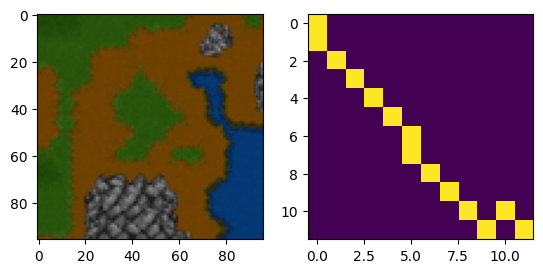

In [3]:
image = np.load(image_path)[0]
label = np.load(label_path)[0]
#plot the image and label side by side
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax2.imshow(label)


(123,)


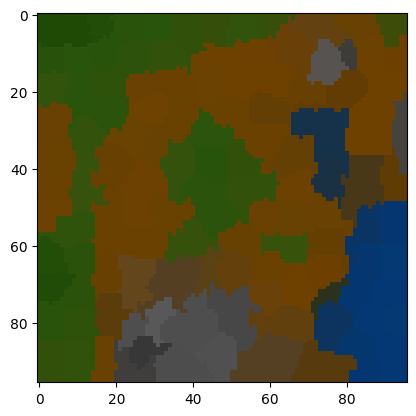

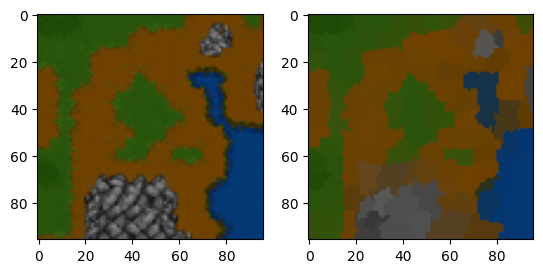

In [4]:
#use normal slic on the image
from skimage.segmentation import slic
#apply slic to the image
segments = slic(image, n_segments=200, compactness=10, sigma=0.0)

#plot the segments as a boundary
from skimage.segmentation import mark_boundaries
boundaries = mark_boundaries(image, segments)
plt.imshow(boundaries)
new_image = np.zeros((96, 96, 3))
#the segments are a 2d array of the same size as the image, and they assign
#where each pixel belongs to a superpixel, so use the superpixel classification
#to calculate the average colour of each superpixel

#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #now set the new image to have the average colour in the segment
    new_image[indices] = average_colour
#plot the new image
new_image = new_image / 255
plt.imshow(new_image)

#plot this alongside the original image
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
plt.show()

In [5]:
#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment

#find the average colour of each segment
average_colours = []
#find the centroid of each segment
centroids = []
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #find the centroid of the segment
    centroid = np.mean(indices, axis=1)
    #now set the new image to have the average colour in the segment
    average_colours.append(average_colour)
    centroids.append(centroid)

(123,)


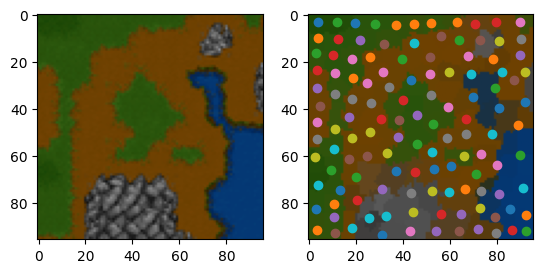

In [6]:
#plot the centroids with their average colours
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
for i in range(len(centroids)):
    axs[1].scatter(centroids[i][0], centroids[i][1])
plt.show()


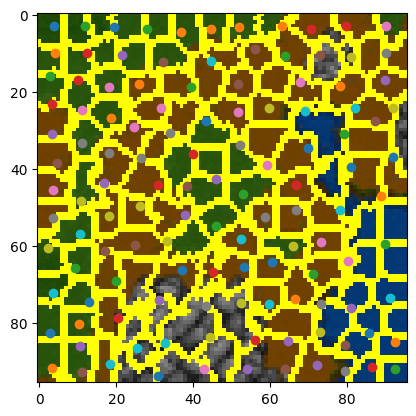

In [7]:
#plot the centodi, new_image and the borders associated with the slic in one image
plt.imshow(boundaries)
#plt.imshow(new_image, alpha=0.5)
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1])

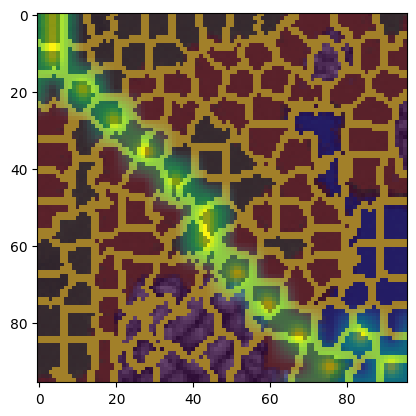

In [8]:
#show the boundaries on botht he image and the label
plt.imshow(boundaries)
#rescale the label to be the same size as the image
label = sk.transform.resize(label, (96, 96))
plt.imshow(label, alpha=0.5)


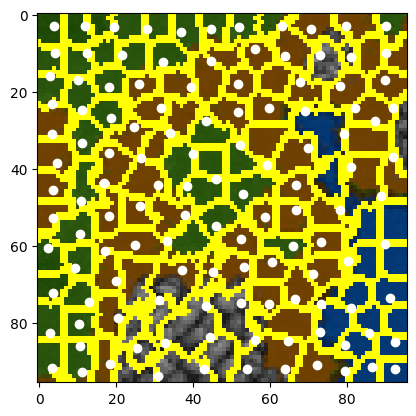

In [9]:
from skimage.measure import regionprops
plt.imshow(boundaries)
regions = regionprops(segments)
for props in regions:
    cx, cy = props.centroid  
    plt.plot(cx, cy, 'o', color="white")

In [10]:
#connect the centroids together based on their pixel location. Like you would do an image
#processing algorithm


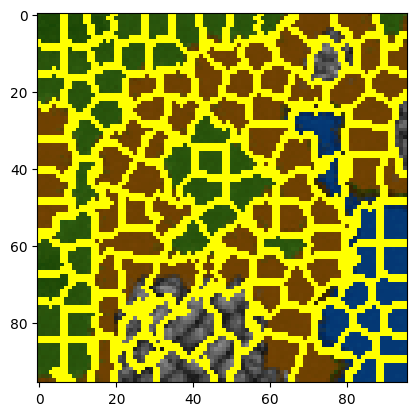

In [11]:
#creaetea  graph out of the centroids
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(len(centroids)))
#add edges between the centroids
for i in range(len(centroids)):
    for j in range(len(centroids)):
        if i != j:
            G.add_edge(i, j, weight=np.linalg.norm(centroids[i] - centroids[j]))
#now plot the graph
plt.imshow(boundaries)


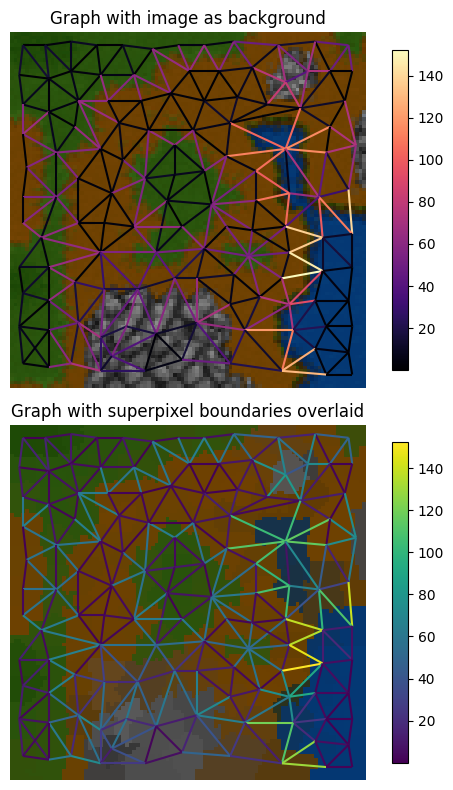

In [12]:
from skimage import data, segmentation
from skimage import graph
img = image
labels = segments
g = graph.rag_mean_color(img, labels)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].set_title('Graph with image as background')
lc = graph.show_rag(labels, g, img, ax=ax[0])
# specify the fraction of the plot area that will be used to draw the colorbar
ax[0].imshow(img)
fig.colorbar(lc, fraction=0.03, ax=ax[0])

ax[1].set_title("Graph with superpixel boundaries overlaid")

lc = graph.show_rag(labels, g, img, img_cmap='gray', edge_cmap='viridis', ax=ax[1])
fig.colorbar(lc, fraction=0.03, ax=ax[1])
ax[1].imshow(new_image)
for a in ax:
    a.axis('off')



plt.tight_layout()
plt.show()

/home/duser/venv/lib/python3.9/site-packages/torch_geometric/utils/convert.py:260: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  data[key] = torch.tensor(value)


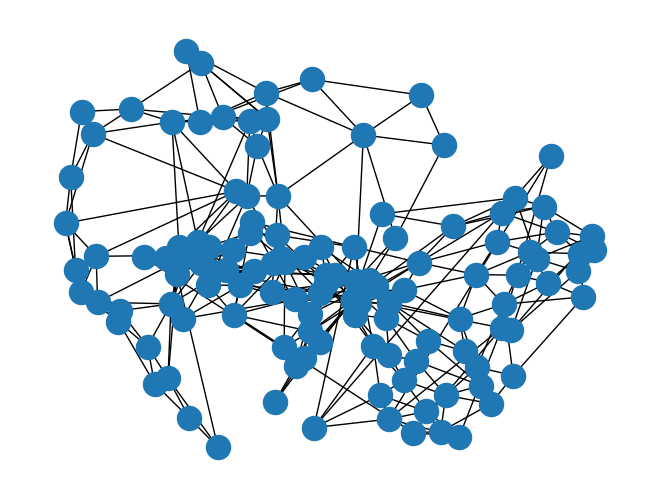

In [13]:
graph_two = graph.rag_mean_color(new_image, labels)
graph_two
type(graph_two)
nx.draw(graph_two)
graph_three = nx.Graph(graph_two)
#convert graph_three to pytorch geometric
import torch_geometric
from torch_geometric.data import Data
#convert the graph to a torch geometric data object
data = torch_geometric.utils.from_networkx(graph_three)

In [14]:
data
data["pixel count"]
data.pixel_count = data["pixel count"]
data.mean_color = data["mean color"]
data.total_color = data["total color"]  


In [15]:
data

Data(edge_index=[2, 656], labels=[123, 1], pixel count=[123], total color=[123, 3], mean color=[123, 3], weight=[656], num_nodes=123, pixel_count=[123], mean_color=[123, 3], total_color=[123, 3])

In [16]:
data.edge_attr

# How to extract the edge_weights etc

In [17]:
data.edge_weight

In [18]:
lc

In [19]:
g.edges


EdgeView([(1, 2), (1, 23), (1, 24), (2, 3), (2, 24), (2, 14), (3, 4), (3, 14), (4, 5), (4, 14), (4, 17), (5, 6), (5, 17), (5, 18), (6, 7), (6, 18), (6, 19), (6, 25), (7, 8), (7, 19), (8, 9), (8, 19), (8, 20), (9, 10), (9, 13), (9, 20), (10, 11), (10, 13), (10, 21), (10, 22), (11, 12), (11, 15), (11, 22), (12, 15), (12, 16), (13, 20), (13, 21), (13, 26), (13, 33), (14, 17), (14, 24), (14, 27), (15, 22), (15, 16), (15, 30), (15, 34), (16, 30), (17, 18), (17, 27), (17, 32), (18, 25), (18, 28), (18, 32), (19, 20), (19, 25), (19, 29), (20, 26), (20, 29), (21, 22), (21, 34), (21, 33), (22, 34), (23, 24), (23, 31), (24, 27), (24, 31), (24, 35), (25, 28), (25, 29), (25, 38), (25, 39), (26, 33), (26, 29), (26, 36), (27, 35), (27, 32), (27, 42), (27, 37), (27, 47), (28, 32), (28, 37), (28, 38), (29, 36), (29, 39), (30, 34), (30, 40), (30, 41), (31, 35), (31, 43), (32, 37), (33, 34), (33, 36), (34, 40), (34, 36), (34, 45), (35, 42), (35, 43), (35, 46), (36, 39), (36, 45), (36, 49), (37, 38), (37,

In [20]:
data.weight.shape

data.edge_index.shape
data.edge_attr = data.weight

In [21]:
data.edge_attr

tensor([1.6295e-03, 5.2201e-02, 5.8369e-02, 1.6295e-03, 1.6318e-02, 5.7181e-02,
        5.2549e-02, 1.6318e-02, 3.9840e-02, 3.6289e-02, 3.9840e-02, 3.8436e-03,
        3.5599e-03, 1.4826e-02, 3.8436e-03, 3.4814e-02, 1.4395e-02, 3.6276e-02,
        3.4814e-02, 1.3912e-02, 2.6064e-03, 2.5027e-01, 2.3783e-01, 1.3912e-02,
        1.9848e-02, 2.3639e-01, 1.9848e-02, 2.3440e-02, 2.5411e-01, 2.5136e-01,
        2.3440e-02, 1.8939e-01, 2.0719e-01, 2.2957e-01, 1.8939e-01, 5.4777e-02,
        3.6578e-02, 2.6863e-01, 2.1939e-01, 5.4777e-02, 1.8124e-01, 1.1938e-02,
        2.7233e-01, 1.8124e-01, 1.9188e-01, 1.9459e-01, 2.0719e-01, 3.6578e-02,
        3.4647e-02, 3.0053e-01, 3.6084e-02, 2.3817e-02, 5.2549e-02, 3.6289e-02,
        3.5599e-03, 1.6896e-02, 5.0550e-03, 2.8580e-02, 1.1938e-02, 1.9188e-01,
        2.8337e-01, 4.3934e-03, 6.4103e-03, 4.2530e-02, 1.9459e-01, 4.3934e-03,
        5.6077e-03, 1.4826e-02, 1.4395e-02, 1.6896e-02, 2.2282e-02, 1.1856e-02,
        2.5348e-01, 3.6276e-02, 2.6064e-

(array([250., 102.,  26.,  12.,   4.,  18.,  26.,  88.,  56.,  24.,   6.,
          2.,   2.,  12.,   8.,   6.,   2.,   4.,   4.,   4.]),
 array([1.32756049e-04, 2.99892179e-02, 5.98456798e-02, 8.97021417e-02,
        1.19558604e-01, 1.49415065e-01, 1.79271527e-01, 2.09127989e-01,
        2.38984451e-01, 2.68840913e-01, 2.98697375e-01, 3.28553837e-01,
        3.58410299e-01, 3.88266761e-01, 4.18123222e-01, 4.47979684e-01,
        4.77836146e-01, 5.07692608e-01, 5.37549070e-01, 5.67405532e-01,
        5.97261994e-01]),
 <BarContainer object of 20 artists>)

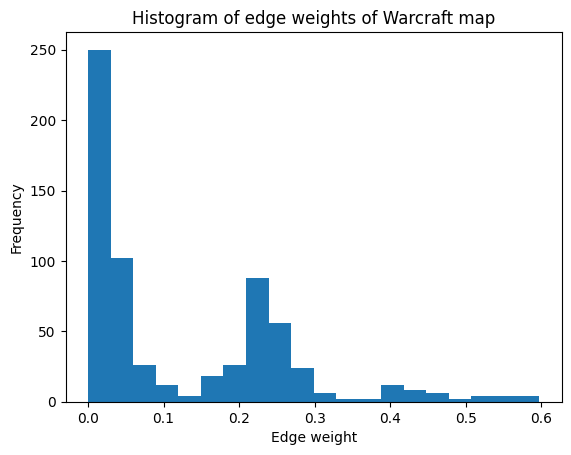

In [22]:
#plot a histogram of the edge weights
plt.show()
plt.title("Histogram of edge weights of Warcraft map")
plt.xlabel("Edge weight")
plt.ylabel("Frequency")
plt.hist(data.edge_attr, bins=20)


In [23]:
torch.save(data, "test_graph.pt")

# This weight represents the distance between the centroids (smaller is closer)

Putting it all together

(123,)


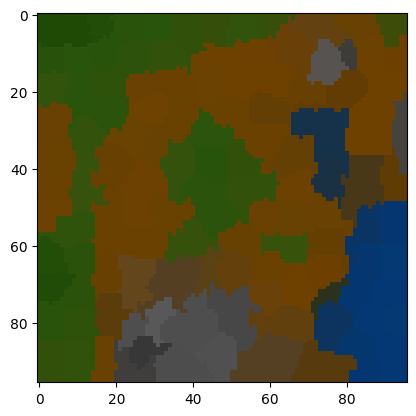

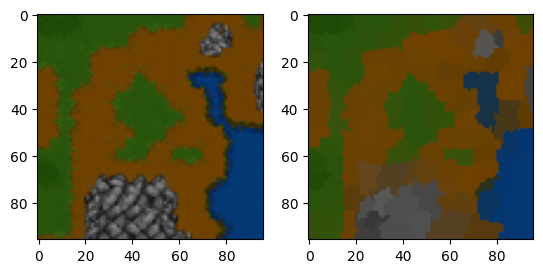

In [24]:
#use normal slic on the image
from skimage.segmentation import slic
#apply slic to the image
segments = slic(image, n_segments=200, compactness=10, sigma=0.0)

#plot the segments as a boundary
from skimage.segmentation import mark_boundaries
boundaries = mark_boundaries(image, segments)
plt.imshow(boundaries)
new_image = np.zeros((96, 96, 3))
#the segments are a 2d array of the same size as the image, and they assign
#where each pixel belongs to a superpixel, so use the superpixel classification
#to calculate the average colour of each superpixel

#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #now set the new image to have the average colour in the segment
    new_image[indices] = average_colour
#plot the new image
new_image = new_image / 255
plt.imshow(new_image)

#plot this alongside the original image
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
plt.show()

In [25]:
labels = segments
labels = labels 

regions = regionprops(labels)

In [26]:
from skimage import graph
from skimage import graph, data, io, segmentation, color
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage import draw
import numpy as np
import networkx as nx
 
rag = graph.rag_mean_color(image, labels)
for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']
graph_x = nx.Graph(rag)


In [27]:
#conver to torch geometric
import torch_geometric as pyg
from torch_geometric.data import Data
data = pyg.utils.from_networkx(graph_x)
data["centroid"]

tensor([[ 3.9355,  3.0484],
        [ 3.9828,  9.9483],
        [ 2.8333, 16.0238],
        [ 3.1967, 23.2787],
        [ 3.2308, 30.8846],
        [ 4.6351, 38.6622],
        [ 3.4576, 45.5763],
        [ 3.5873, 52.8254],
        [ 2.3409, 60.5682],
        [ 3.6383, 72.3511],
        [ 2.7857, 82.6286],
        [ 3.3684, 91.6842],
        [ 9.2128, 65.8191],
        [10.0000, 16.9808],
        [10.5156, 86.0312],
        [10.9767, 92.9302],
        [11.0156, 24.6562],
        [11.0000, 33.4675],
        [10.8421, 48.4737],
        [10.6102, 56.9661],
        [13.0241, 74.5542],
        [10.4444, 80.4815],
        [11.8571,  2.9184],
        [12.3793, 10.0517],
        [16.7931, 43.6437],
        [17.0308, 61.3231],
        [18.1918, 18.8493],
        [18.1111, 35.9206],
        [18.0984, 52.3443],
        [18.2817, 90.6338],
        [19.3871,  3.2097],
        [18.6724, 26.8448],
        [19.9692, 69.0769],
        [20.3673, 78.7041],
        [21.6143, 10.5143],
        [24.7927, 59

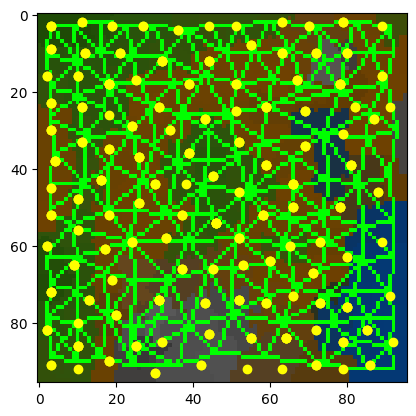

In [28]:
#plot the graph with the centroids
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    for u, v, attr in g.edges(data=True):
        n1 = u
        n2 = v
 
        r1, c1 = map(int, rag.nodes[n1]['centroid'])
        r2, c2 = map(int, rag.nodes[n2]['centroid'])
 
        line  = draw.line(r1, c1, r2, c2)
        #circle = draw.circle(r1,c1,2)
 
        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        
        #image[circle] = 1,1,0
        #add scatter 
        plt.scatter(r1, c1, color="yellow")
 
    return image
image_with_rag = display_edges(new_image, rag, threshold=np.inf)
plt.imshow(image_with_rag)

In [29]:
rag.edges().data()

EdgeDataView([(1, 2, {'weight': 0.4155304885351556}), (1, 23, {'weight': 13.311367200734258}), (1, 24, {'weight': 14.884172446270147}), (2, 3, {'weight': 4.161157755009344}), (2, 24, {'weight': 14.581172197039397}), (2, 14, {'weight': 13.400075513223994}), (3, 4, {'weight': 10.159086143752548}), (3, 14, {'weight': 9.253778865139136}), (4, 5, {'weight': 0.9801243652711776}), (4, 14, {'weight': 0.9077797550874617}), (4, 17, {'weight': 3.78073740122005}), (5, 6, {'weight': 8.877616002286391}), (5, 17, {'weight': 3.6707409648777336}), (5, 18, {'weight': 9.250331833415723}), (6, 7, {'weight': 3.54767860593072}), (6, 18, {'weight': 0.6646399490390161}), (6, 19, {'weight': 63.81758205559151}), (6, 25, {'weight': 60.645675027876194}), (7, 8, {'weight': 5.061329322220847}), (7, 19, {'weight': 60.27911756727406}), (8, 9, {'weight': 5.9772764830466265}), (8, 19, {'weight': 64.79752205780133}), (8, 20, {'weight': 64.09565209972477}), (9, 10, {'weight': 48.29415050178165}), (9, 13, {'weight': 52.83

## Recreating the label as a graph
We have a set of labels as images. If we take the path and find the shortest Euclidean distance between the path and the nearest centroid, we label that centroid's cell as the path.

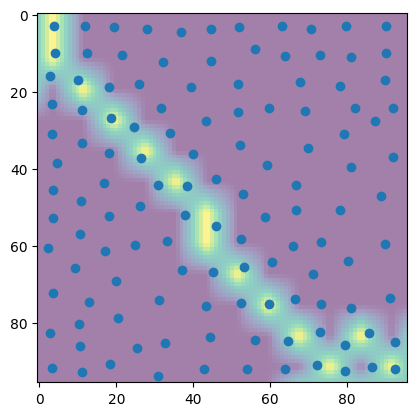

In [30]:
#plt.imshow(boundaries)
#rescale the label to be the same size as the image
label = sk.transform.resize(label, (96, 96))
plt.imshow(label, alpha=0.5)
plt.scatter(data["centroid"][:,0], data["centroid"][:,1])

In [37]:
# Check datatypes:
#print((data["centroid"]))
print(np.max(label))

0.003676470588235294


In [32]:
centroid_is_path = np.zeros(len(data["centroid"])) # One-hot encoding if a centroid is part of the path or not
centroid = data["centroid"].numpy()

for row in range(len(label)):
    true_path = np.argmax(label[row]) # Take the true path index as the 'brightest' point on each row
    dists = [np.linalg.norm([row, true_path] - c) for c in centroid]

    centroid_is_path[np.argmin(dists)] = 1

centroid_is_path

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0.])

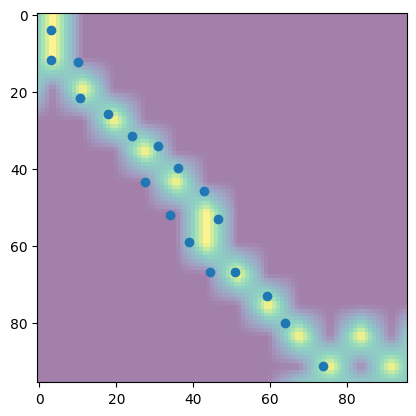

In [33]:
label = sk.transform.resize(label, (96, 96))
plt.imshow(label, alpha=0.5)
plt.scatter(data["centroid"][np.argwhere(centroid_is_path),1], data["centroid"][np.argwhere(centroid_is_path),0])

So choosing the brightest spots row-wise isn't a robust way to reconstruct the path

In [68]:
centroid_is_path = np.zeros(len(data["centroid"])) # One-hot encoding if a centroid is part of the path or not
centroid = data["centroid"].numpy()

for row in range(len(label)):
    for column in range(len(label)):
        if label[row, column] > np.max(label) - (0.3*np.max(label)): # Choose the 30% brightest spots on the label only
            dists = [np.linalg.norm([row, column] - c) for c in centroid]

            centroid_is_path[np.argmin(dists)] = 1

centroid_is_path

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1.])

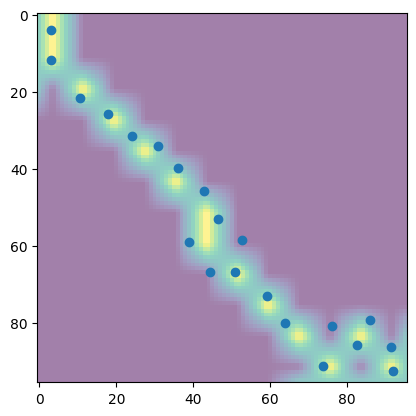

In [69]:
label = sk.transform.resize(label, (96, 96))
plt.imshow(label, alpha=0.5)
plt.scatter(data["centroid"][np.argwhere(centroid_is_path),1], data["centroid"][np.argwhere(centroid_is_path),0])

In [70]:
def path_to_graph(centroids, label, sensitivity=0.3):
    # Return a one-hot tensor of which centroids are in the path
    centroid_is_path = np.zeros(len(centroids)) # One-hot encoding if a centroid is part of the path or not
    centroid = centroids.numpy()

    for row in range(len(label)):
        for column in range(len(label)):
            if label[row, column] > np.max(label) - (sensitivity*np.max(label)): # Choose the 30% brightest spots on the label only
                dists = [np.linalg.norm([row, column] - c) for c in centroid]

                centroid_is_path[np.argmin(dists)] = 1

    return torch.tensor(centroid_is_path)